In [1]:
import pandas as pd
from pathlib import Path

# Full path to the dataset
data_path = Path(r"C:\Users\Abhijeet\UIDAI-Data-Hackathon\UIDAI-Data-Hackathon\dataset\demographics.csv")

# Check if the file exists
if not data_path.exists():
    raise FileNotFoundError(f"{data_path} not found")
    
# Load the dataset
df = pd.read_csv(data_path)
# Preview the first rows

df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Maharashtra,Mumbai Suburban,400072,159,1180
1,01-03-2025,Maharashtra,Mumbai Suburban,400043,230,1648
2,01-03-2025,Maharashtra,Mumbai Suburban,400091,23,263
3,01-03-2025,Maharashtra,Mumbai Suburban,400052,13,243
4,01-03-2025,Maharashtra,Mumbai Suburban,400082,16,81


In [2]:
# -------------------------------
# Find unique values for all columns
# -------------------------------

for col in df.columns:
    unique_vals = df[col].unique()  # get all unique values
    num_unique = len(unique_vals)   # count of unique values
    num_missing = df[col].isnull().sum()  # missing values
    
    # Print column name, number of unique values, missing count, and first 10 unique values
    print(f"\nColumn: {col}")
    print(f"Unique count: {num_unique}")
    print(f"Missing values: {num_missing}")
    print(f"Sample unique values: {list(unique_vals[:10])}")



Column: date
Unique count: 106
Missing values: 0
Sample unique values: ['01-03-2025', '01-05-2025', '01-06-2025', '01-07-2025', '01-09-2025', '02-09-2025', '03-09-2025', '05-09-2025', '04-09-2025', '06-09-2025']

Column: state
Unique count: 1
Missing values: 0
Sample unique values: ['Maharashtra']

Column: district
Unique count: 1
Missing values: 0
Sample unique values: ['Mumbai Suburban']

Column: pincode
Unique count: 57
Missing values: 0
Sample unique values: [400072, 400043, 400091, 400052, 400082, 400081, 400051, 400088, 400097, 400104]

Column: demo_age_5_17
Unique count: 81
Missing values: 0
Sample unique values: [159, 230, 23, 13, 16, 32, 60, 65, 142, 464]

Column: demo_age_17_
Unique count: 174
Missing values: 0
Sample unique values: [1180, 1648, 263, 243, 81, 360, 578, 416, 1237, 1041]


In [ ]:
Which pincode is getting the most Aadhaar updates?

In [3]:
pincode_total = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_total['total_updates'] = pincode_total['demo_age_5_17'] + pincode_total['demo_age_17_']
pincode_total.sort_values('total_updates', ascending=False)


,pincode,demo_age_5_17,demo_age_17_,total_updates
3,400043,2481,14782,17263
22,400067,904,9808,10712
27,400072,1300,9179,10479
53,400101,954,9170,10124
50,400097,993,8702,9695
25,400070,1299,8041,9340
56,400104,747,8263,9010
48,400095,795,7460,8255
23,400068,558,6389,6947
34,400080,437,4261,4698


In [ ]:
Total updates by pincode

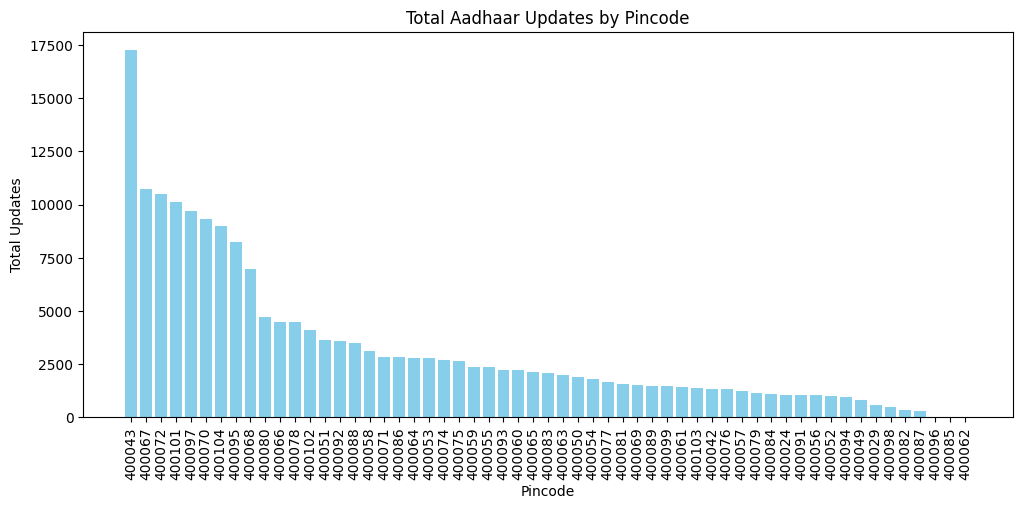

In [8]:
import matplotlib.pyplot as plt

# Aggregate total updates per pincode
pincode_total = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_total['total_updates'] = pincode_total['demo_age_5_17'] + pincode_total['demo_age_17_']
pincode_total = pincode_total.sort_values('total_updates', ascending=False)

# Plot
plt.figure(figsize=(12,5))
plt.bar(pincode_total['pincode'].astype(str), pincode_total['total_updates'], color='skyblue')
plt.xlabel('Pincode')
plt.ylabel('Total Updates')
plt.title('Total Aadhaar Updates by Pincode')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Which pincode has the highest daily load? This helps in resource planning.

In [4]:
daily_avg = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].mean().reset_index()
daily_avg['total_avg'] = daily_avg['demo_age_5_17'] + daily_avg['demo_age_17_']
daily_avg.sort_values('total_avg', ascending=False)


,pincode,demo_age_5_17,demo_age_17_,total_avg
3,400043,23.405660,139.452830,162.858491
22,400067,8.692308,94.307692,103.000000
27,400072,12.380952,87.419048,99.800000
53,400101,9.085714,87.333333,96.419048
50,400097,9.548077,83.673077,93.221154
25,400070,12.254717,75.858491,88.113208
56,400104,7.114286,78.695238,85.809524
48,400095,7.644231,71.730769,79.375000
23,400068,5.417476,62.029126,67.446602
34,400080,4.242718,41.368932,45.611650


In [ ]:
Which areas are adult-dominated updates? UIDAI may prioritize adult-oriented outreach here.

In [5]:
pincode_ratio = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_ratio['age_ratio'] = pincode_ratio['demo_age_17_'] / (pincode_ratio['demo_age_5_17'] + 1)
pincode_ratio.sort_values('age_ratio', ascending=False)


,pincode,demo_age_5_17,demo_age_17_,age_ratio
52,400099,72,1372,18.794521
41,400087,16,285,16.764706
9,400054,111,1678,14.982143
4,400049,49,746,14.920000
12,400057,82,1163,14.012048
31,400077,114,1512,13.147826
7,400052,69,919,13.128571
16,400061,99,1297,12.970000
45,400092,258,3297,12.729730
55,400103,99,1262,12.620000


In [ ]:
Find spikes in updates for particular pincodes. Useful for weekly/monthly staffing.

In [7]:
pincode_daily = df.groupby(['date', 'pincode'])[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()


In [ ]:
Child vs Adult updates per pincode

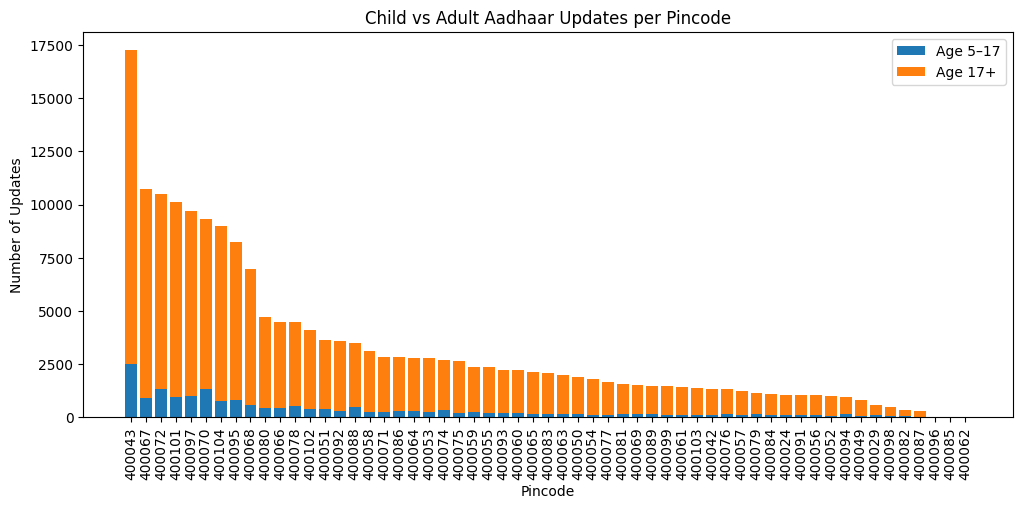

In [9]:
plt.figure(figsize=(12,5))
plt.bar(pincode_total['pincode'].astype(str), pincode_total['demo_age_5_17'], label='Age 5–17')
plt.bar(pincode_total['pincode'].astype(str), pincode_total['demo_age_17_'],
        bottom=pincode_total['demo_age_5_17'], label='Age 17+')
plt.xlabel('Pincode')
plt.ylabel('Number of Updates')
plt.title('Child vs Adult Aadhaar Updates per Pincode')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
Daily updates for top 5 busiest pincodes

In [11]:
import seaborn as sns

# Pivot table: date x pincode
heatmap_data = df.pivot_table(index='date', columns='pincode', 
                              values='demo_age_5_17', aggfunc='sum').fillna(0)

plt.figure(figsize=(15,6))
sns.heatmap(heatmap_data.T, cmap='YlOrRd', cbar_kws={'label':'Child Updates'})
plt.xlabel('Date')
plt.ylabel('Pincode')
plt.title('Heatmap of Child Aadhaar Updates by Pincode and Date')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
Adult-to-Child ratio per pincode

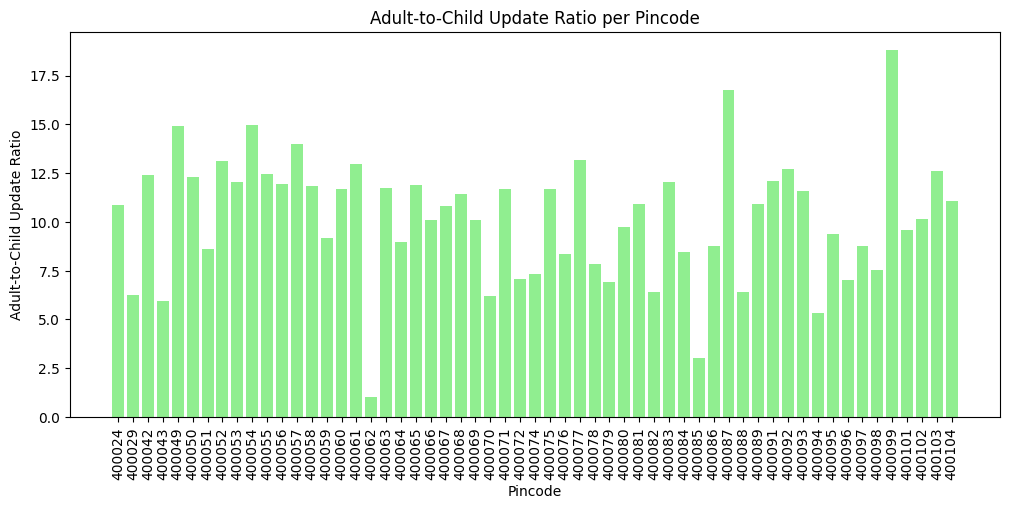

In [12]:
pincode_ratio = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_ratio['age_ratio'] = pincode_ratio['demo_age_17_'] / (pincode_ratio['demo_age_5_17'] + 1)

plt.figure(figsize=(12,5))
plt.bar(pincode_ratio['pincode'].astype(str), pincode_ratio['age_ratio'], color='lightgreen')
plt.xlabel('Pincode')
plt.ylabel('Adult-to-Child Update Ratio')
plt.title('Adult-to-Child Update Ratio per Pincode')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Stress indicator = (total updates / max updates) → shows pressure
Stress indicator per pincode

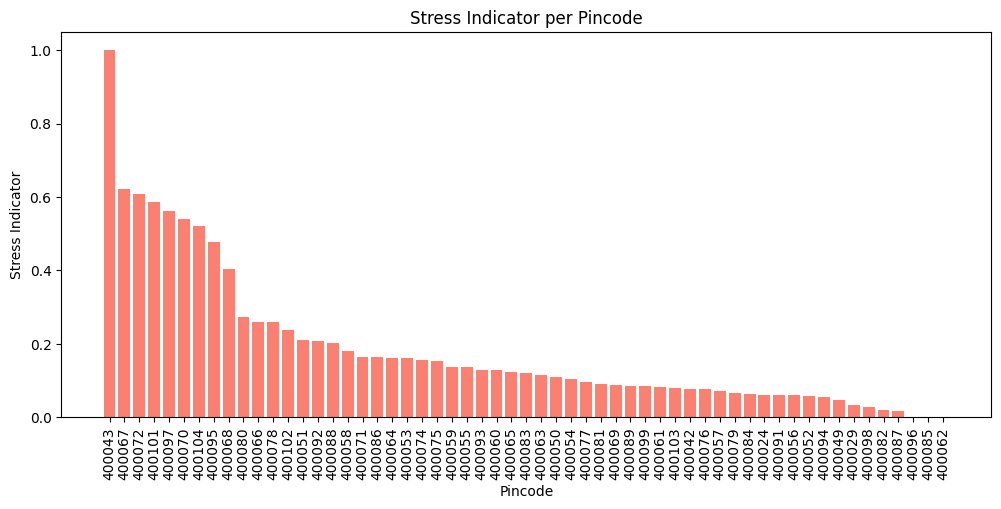

In [13]:
# Stress = total updates / max(total updates)
pincode_total['stress'] = pincode_total['total_updates'] / pincode_total['total_updates'].max()

plt.figure(figsize=(12,5))
plt.bar(pincode_total['pincode'].astype(str), pincode_total['stress'], color='salmon')
plt.xlabel('Pincode')
plt.ylabel('Stress Indicator')
plt.title('Stress Indicator per Pincode')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Cumulative updates per pincode

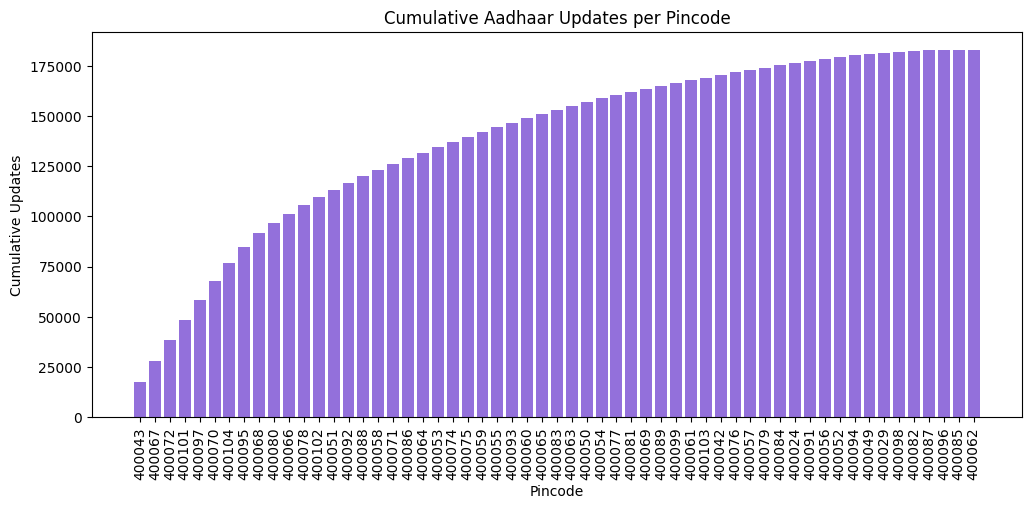

In [14]:
pincode_total['cumulative_updates'] = pincode_total['total_updates'].cumsum()

plt.figure(figsize=(12,5))
plt.bar(pincode_total['pincode'].astype(str), pincode_total['cumulative_updates'], color='mediumpurple')
plt.xlabel('Pincode')
plt.ylabel('Cumulative Updates')
plt.title('Cumulative Aadhaar Updates per Pincode')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Red Zone

C:\Users\Abhijeet\AppData\Local\Temp\ipykernel_14276\2963792829.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_bottlenecks = monthly_pincode.groupby('month').apply(flag_bottlenecks)


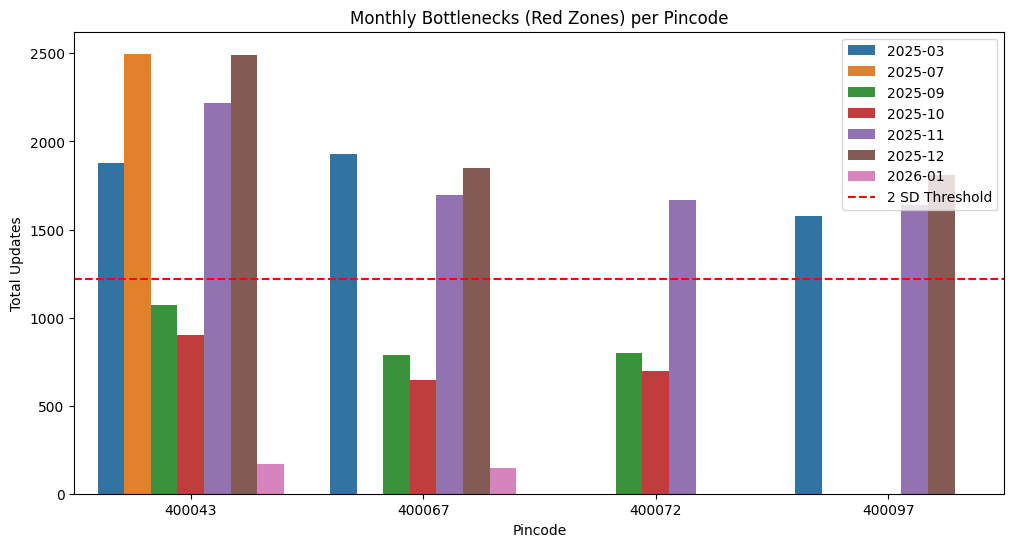

In [15]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Extract month and year
df['month'] = df['date'].dt.to_period('M')

# Aggregate total updates per pincode per month
monthly_pincode = df.groupby(['month', 'pincode'])[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
monthly_pincode['total_updates'] = monthly_pincode['demo_age_5_17'] + monthly_pincode['demo_age_17_']
# Function to flag bottlenecks per month
def flag_bottlenecks(group):
    mean = group['total_updates'].mean()
    sd = group['total_updates'].std()
    threshold = mean + 2 * sd
    group['is_bottleneck'] = group['total_updates'] > threshold
    group['mean'] = mean
    group['sd'] = sd
    group['threshold'] = threshold
    return group

# Apply per month
monthly_bottlenecks = monthly_pincode.groupby('month').apply(flag_bottlenecks)
# Only show bottlenecks
red_zones = monthly_bottlenecks[monthly_bottlenecks['is_bottleneck']]
red_zones[['month', 'pincode', 'total_updates', 'mean', 'sd', 'threshold']]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=red_zones, x='pincode', y='total_updates', hue='month', dodge=True)
plt.axhline(y=red_zones['threshold'].mean(), color='red', linestyle='--', label='2 SD Threshold')
plt.xlabel('Pincode')
plt.ylabel('Total Updates')
plt.title('Monthly Bottlenecks (Red Zones) per Pincode')
plt.legend()
plt.show()


In [16]:
Tracking Signal

Expected Value → average of the previous 3 months
Error → Actual − Expected
MAD=mean(∣actual previous values−mean(previous)∣)
Tracking Signal → Error / MAD

SyntaxError: invalid syntax (1744714468.py, line 1)

In [17]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Extract month-year
df['month'] = df['date'].dt.to_period('M')

# Aggregate total updates per month (across all pincodes)
monthly_total = df.groupby('month')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
monthly_total['total_updates'] = monthly_total['demo_age_5_17'] + monthly_total['demo_age_17_']

monthly_total = monthly_total.sort_values('month').reset_index(drop=True)
monthly_total


,month,demo_age_5_17,demo_age_17_,total_updates
0,2025-03,3093,30766,33859
1,2025-04,1009,8601,9610
2,2025-05,926,5892,6818
3,2025-06,1096,6840,7936
4,2025-07,1853,13667,15520
5,2025-09,1748,15695,17443
6,2025-10,1498,12977,14475
7,2025-11,3129,32558,35687
8,2025-12,3481,35340,38821
9,2026-01,309,2321,2630


In [20]:
# Initialize new columns
monthly_total['expected'] = None
monthly_total['error'] = None
monthly_total['mad'] = None
monthly_total['tracking_signal'] = None

# Loop over months starting from 4th month
for i in range(3, len(monthly_total)):
    prev3 = monthly_total.loc[i-3:i-1, 'total_updates']  # previous 3 months
    expected = prev3.mean()
    error = monthly_total.loc[i, 'total_updates'] - expected
    mad = (prev3 - expected).abs().mean()  # Manual MAD calculation
    ts = error / mad if mad != 0 else 0
    
    monthly_total.loc[i, 'expected'] = expected
    monthly_total.loc[i, 'error'] = error
    monthly_total.loc[i, 'mad'] = mad
    monthly_total.loc[i, 'tracking_signal'] = ts

# Flag surprise months
monthly_total['surprise'] = monthly_total['tracking_signal'] > 4

monthly_total[['month', 'total_updates', 'expected', 'tracking_signal', 'surprise']]


,month,total_updates,expected,tracking_signal,surprise
0,2025-03,33859,None,None,False
1,2025-04,9610,None,None,False
2,2025-05,6818,None,None,False
3,2025-06,7936,16762.333333,-0.774391,False
4,2025-07,15520,8121.333333,7.454993,True
5,2025-09,17443,10091.333333,2.031346,False
6,2025-10,14475,13633.0,0.221696,False
7,2025-11,35687,15812.666667,18.285524,True
8,2025-12,38821,22535.0,1.857436,False
9,2026-01,2630,29661.0,-2.669992,False


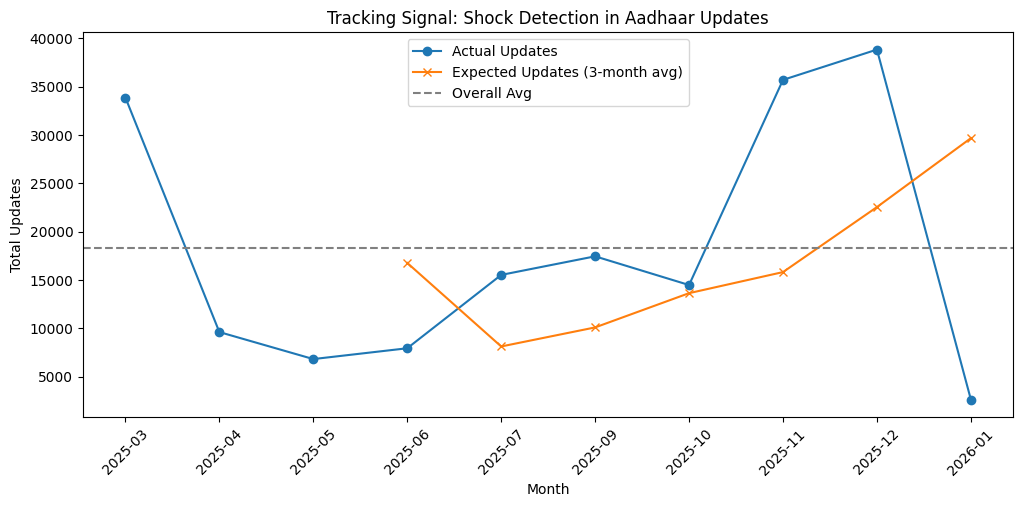

In [21]:
plt.figure(figsize=(12,5))
plt.plot(monthly_total['month'].astype(str), monthly_total['total_updates'], marker='o', label='Actual Updates')
plt.plot(monthly_total['month'].astype(str), monthly_total['expected'], marker='x', label='Expected Updates (3-month avg)')
plt.axhline(y=monthly_total['total_updates'].mean(), color='grey', linestyle='--', label='Overall Avg')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Updates')
plt.title('Tracking Signal: Shock Detection in Aadhaar Updates')
plt.legend()
plt.show()


In [22]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,month
0,2025-03-01,Maharashtra,Mumbai Suburban,400072,159,1180,2025-03
1,2025-03-01,Maharashtra,Mumbai Suburban,400043,230,1648,2025-03
2,2025-03-01,Maharashtra,Mumbai Suburban,400091,23,263,2025-03
3,2025-03-01,Maharashtra,Mumbai Suburban,400052,13,243,2025-03
4,2025-03-01,Maharashtra,Mumbai Suburban,400082,16,81,2025-03


Regional Demand Volatility Score (Mumbai Suburban, last 6 months): 1479.76


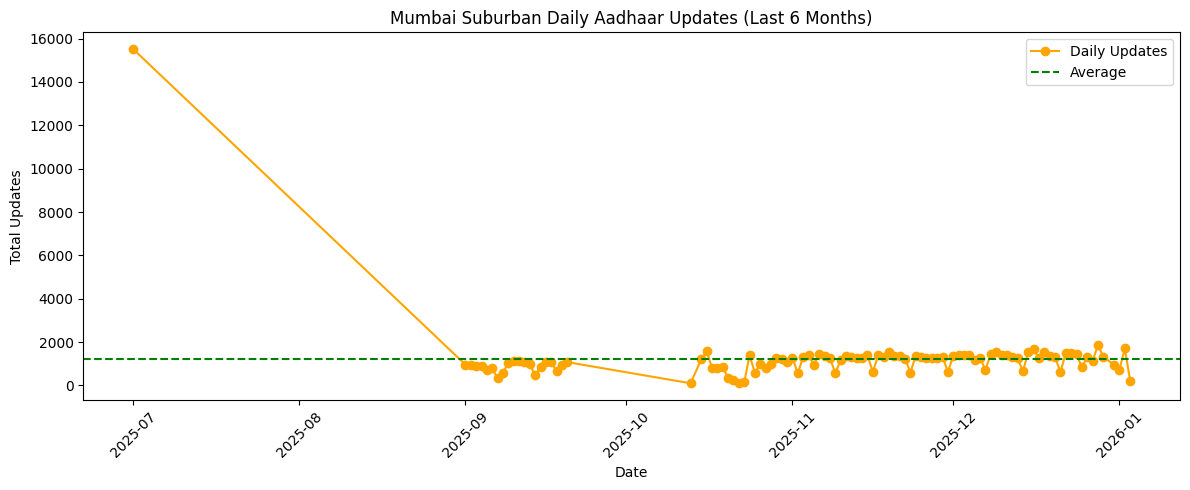

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter data for Mumbai Suburban
mumbai_df = df[df['district'] == 'Mumbai Suburban'].copy()

# Ensure date is datetime
mumbai_df['date'] = pd.to_datetime(mumbai_df['date'], dayfirst=True)

# Step 2: Aggregate total updates per day
mumbai_daily = mumbai_df.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
mumbai_daily['total_updates'] = mumbai_daily['demo_age_5_17'] + mumbai_daily['demo_age_17_']

# Step 3: Extract month-year
mumbai_daily['month'] = mumbai_daily['date'].dt.to_period('M')

# Step 4: Identify last 6 months
last_6_months = mumbai_daily['month'].unique()[-6:]

# Step 5: Filter data for last 6 months
mumbai_last6 = mumbai_daily[mumbai_daily['month'].isin(last_6_months)]

# Step 6: Calculate Volatility Score (Standard Deviation)
volatility_score = mumbai_last6['total_updates'].std()

print(f"Regional Demand Volatility Score (Mumbai Suburban, last 6 months): {volatility_score:.2f}")

# Optional Step 7: Plot
plt.figure(figsize=(12,5))
plt.plot(mumbai_last6['date'], mumbai_last6['total_updates'], marker='o', color='orange', label='Daily Updates')
plt.axhline(y=mumbai_last6['total_updates'].mean(), color='green', linestyle='--', label='Average')
plt.xlabel('Date')
plt.ylabel('Total Updates')
plt.title('Mumbai Suburban Daily Aadhaar Updates (Last 6 Months)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


District Average Child-to-Adult Ratio: 0.10
    pincode  demo_age_5_17  demo_age_17_  child_to_adult_ratio  backlog_risk
39   400085              0             3              0.000000          True
17   400062              0             1              0.000000          True
52   400099             72          1372              0.052440          True
41   400087             16           285              0.055944          True
4    400049             49           746              0.065596          True
9    400054            111          1678              0.066111          True
49   400096              1            14              0.066667          True
12   400057             82          1163              0.070447          True
7    400052             69           919              0.075000          True
31   400077            114          1512              0.075347          True
16   400061             99          1297              0.076271          True
45   400092            258      

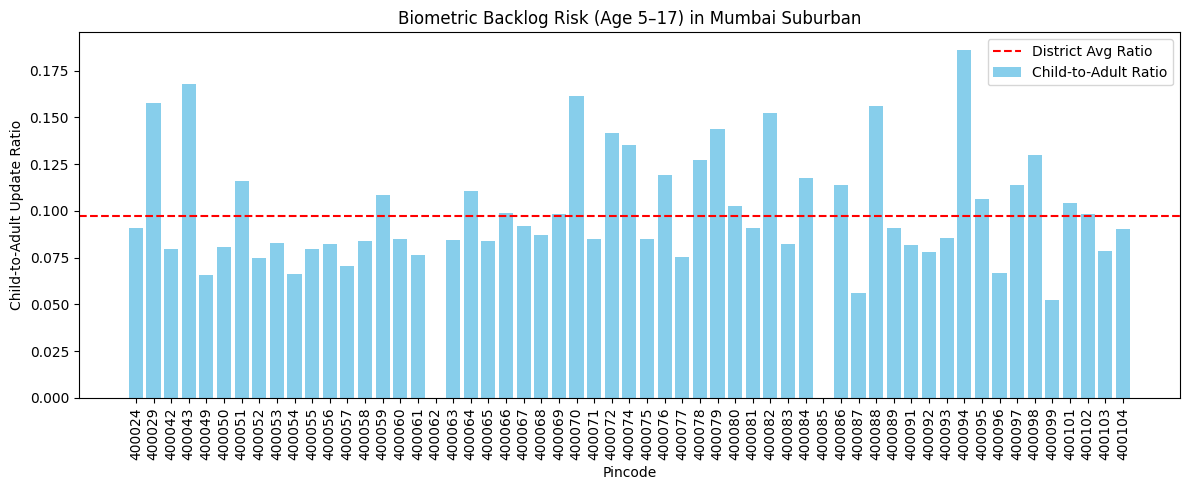

In [26]:
import matplotlib.pyplot as plt

# 1️⃣ Filter for Mumbai Suburban
mumbai_df = df[df['district'] == 'Mumbai Suburban'].copy()

# 2️⃣ Aggregate total updates by pincode
pincode_agg = mumbai_df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

# 3️⃣ Calculate child-to-adult ratio
pincode_agg['child_to_adult_ratio'] = pincode_agg['demo_age_5_17'] / (pincode_agg['demo_age_17_'] + 1)  # +1 to avoid divide by zero

# 4️⃣ Calculate district average
district_avg_ratio = pincode_agg['child_to_adult_ratio'].mean()
print(f"District Average Child-to-Adult Ratio: {district_avg_ratio:.2f}")

# 5️⃣ Flag backlog risk
pincode_agg['backlog_risk'] = pincode_agg['child_to_adult_ratio'] < district_avg_ratio

# 6️⃣ See the pincodes at risk
backlog_pincodes = pincode_agg[pincode_agg['backlog_risk']].sort_values('child_to_adult_ratio')
print(backlog_pincodes[['pincode', 'demo_age_5_17', 'demo_age_17_', 'child_to_adult_ratio', 'backlog_risk']])

# 7️⃣ Plot child-to-adult ratios vs district average
plt.figure(figsize=(12,5))
plt.bar(pincode_agg['pincode'].astype(str), pincode_agg['child_to_adult_ratio'], color='skyblue', label='Child-to-Adult Ratio')
plt.axhline(y=district_avg_ratio, color='red', linestyle='--', label='District Avg Ratio')
plt.xlabel('Pincode')
plt.ylabel('Child-to-Adult Update Ratio')
plt.title('Biometric Backlog Risk (Age 5–17) in Mumbai Suburban')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
Geospatial “Load Balancing”
Stress Indicator = total updates ÷ average updates across all pincodes

Neighbor comparison = checks if a high-stress pincode has neighbors with below-average stress

Red bars → pincodes under load imbalance risk

Green line → average stress = 1

    pincode  total_updates    stress  neighbor_low
3    400043          17263  5.382912          True
23   400068           6947  2.166199          True
25   400070           9340  2.912379          True
27   400072          10479  3.267540          True
48   400095           8255  2.574057          True
50   400097           9695  3.023075          True
53   400101          10124  3.156844          True
56   400104           9010  2.809479          True


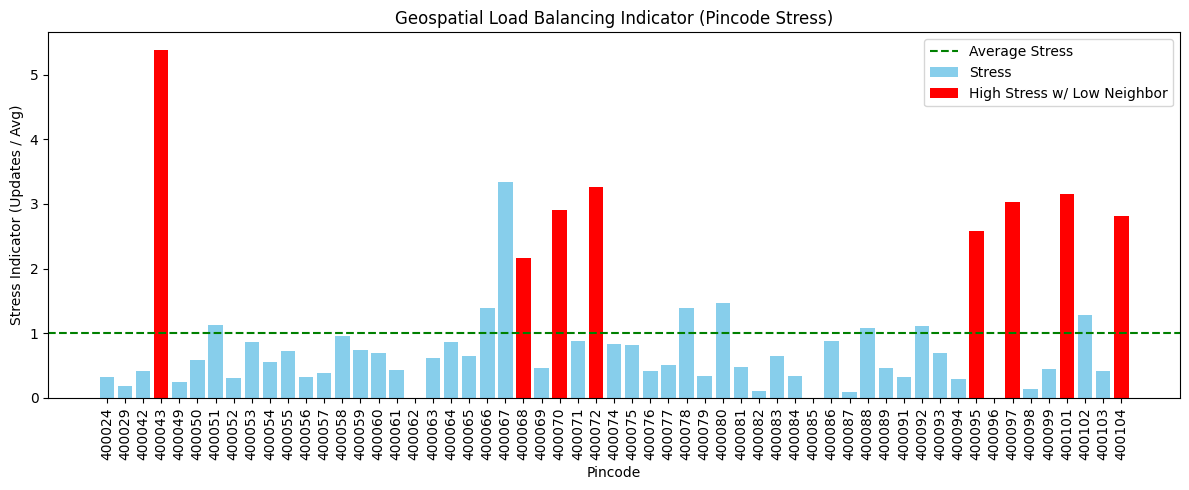

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Aggregate total updates per pincode
pincode_total = df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_total['total_updates'] = pincode_total['demo_age_5_17'] + pincode_total['demo_age_17_']

# 2️⃣ Calculate Stress Indicator
# Stress = current updates / average updates across all pincodes
avg_updates = pincode_total['total_updates'].mean()
pincode_total['stress'] = pincode_total['total_updates'] / avg_updates

# 3️⃣ Sort by pincode to simulate neighboring pincodes
pincode_total = pincode_total.sort_values('pincode').reset_index(drop=True)

# 4️⃣ Identify load imbalances
# Compare stress of each pincode to its previous and next "neighbor" (consecutive pincode)
pincode_total['neighbor_low'] = False

for i in range(len(pincode_total)):
    current_stress = pincode_total.loc[i, 'stress']
    prev_stress = pincode_total.loc[i-1, 'stress'] if i > 0 else current_stress
    next_stress = pincode_total.loc[i+1, 'stress'] if i < len(pincode_total)-1 else current_stress
    
    # Flag if current is high stress and neighbors are low
    if current_stress > 1.5 and (prev_stress < 1 or next_stress < 1):
        pincode_total.loc[i, 'neighbor_low'] = True

# 5️⃣ Show flagged pincodes
load_imbalance = pincode_total[pincode_total['neighbor_low']]
print(load_imbalance[['pincode', 'total_updates', 'stress', 'neighbor_low']])

# 6️⃣ Plot Stress Indicator
plt.figure(figsize=(12,5))
plt.bar(pincode_total['pincode'].astype(str), pincode_total['stress'], color='skyblue', label='Stress')
plt.bar(load_imbalance['pincode'].astype(str), load_imbalance['stress'], color='red', label='High Stress w/ Low Neighbor')
plt.axhline(y=1, color='green', linestyle='--', label='Average Stress')
plt.xlabel('Pincode')
plt.ylabel('Stress Indicator (Updates / Avg)')
plt.title('Geospatial Load Balancing Indicator (Pincode Stress)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
